In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%%time
df_withoutduplicatefeatures4 = pd.read_csv("df_withoutduplicatefeatures4.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 2min 6s
Wall time: 3min 3s


In [22]:
df = df_withoutduplicatefeatures4

In [23]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [24]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
quantity  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
serving_quantity  :  float64
no_nutrition_data  :  object
additives_n  :  float64
additives_en  :  object
nutriscore_score  :  float64
nutriscore_grade  :  object
nova_group  :  float64
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_score  :  float64
ecoscore_grade  :  object
nutrient_levels_tags  :  object
product_quantity  :  float

In [25]:
index=0
for i in (df.loc[10]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 00000000001
url : http://world-en.openfoodfacts.org/product/00000000001/hyde-icon
product_name : hyde icon
abbreviated_product_name : nan
generic_name : nan
quantity : nan
packaging_en : nan
packaging_text : nan
brands : nan
categories_en : nan
origins_en : nan
manufacturing_places : nan
labels_en : nan
emb_codes : nan
first_packaging_code_geo : nan
cities_tags : nan
purchase_places : nan
stores : nan
countries_en : United States
ingredients_text : beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes (shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, aframomum melegueta (seed) (6-paradol

### Suppression ligne où product_name sont null 

In [26]:
df = df.dropna(subset=['product_name'])
df.shape

(2725827, 165)

### Suppression outliers des col _100g
Les features suffixées avec _100g indiquent la quantité de nutriment pour 100g de produit. Les valeurs < 0 ou > 100 sont donc abbérantes. Les lignes où au moins une des features n'est pas dans [0;100] sont supprimées. 
Sauf les features qui ont des unités différentes : energy-kj_100g, energy-kcal_100g, 'energy_100g', 'energy-from-fat_100g',  ph_100g, carbon-footprint_100g, carbon-footprint-from-meat-or-fish_100g, nutrition-score-fr_100g, nutrition-score-uk_100g

In [27]:
g_per_100g_features = ['fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 
                       'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 
                       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 
                       'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 
                       'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 
                       'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 
                       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 
                       'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 
                       'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 
                       'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
                       'added-sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 
                       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'erythritol_100g', 'fiber_100g', 
                       'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 
                       'nucleotides_100g', 'salt_100g', 'added-salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 
                       'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 
                       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 
                       'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 
                       'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 
                       'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 
                       'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 
                       'taurine_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 
                       'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 
                       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'glycemic-index_100g', 
                       'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 
                       'carnitine_100g']

In [28]:
df = df[~(df[g_per_100g_features] > 100).any(axis=1)]
df = df[~(df[g_per_100g_features] < 0).any(axis=1)]
df.shape

(2721528, 165)

Les graisses saturées ne peuvent pas être supérieures au total de graisse, de même pour le sodium avec le sel. Energie max en kJ/g ne peut pas > 37. Donc suppression des lignes si ne respecte pas ces conditions 

In [34]:
df = df[~(df['saturated-fat_100g'] > df['fat_100g'])]
df = df[~(df['sodium_100g'] > df['salt_100g'])]
df = df[~(df['energy_100g'] > 3700)]
df = df[~(df['energy-kcal_100g'] > 900)]
df.shape

(2704017, 165)

In [36]:
df.to_csv("df_after100g.csv", sep='\t', encoding='utf-8', index=False)

In [50]:
df.shape

(2704017, 165)

In [49]:
%%time
df = pd.read_csv("df_after100g.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 1min 42s
Wall time: 3min 36s


In [31]:
for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':  # Vérifie si le type de données de la colonne n'est pas "object"
        print(df.dtypes.index[i], ' : ', df.dtypes[i])

serving_quantity  :  float64
additives_n  :  float64
nutriscore_score  :  float64
nova_group  :  float64
ecoscore_score  :  float64
product_quantity  :  float64
unique_scans_n  :  float64
completeness  :  float64
energy-kj_100g  :  float64
energy-kcal_100g  :  float64
energy_100g  :  float64
energy-from-fat_100g  :  float64
fat_100g  :  float64
saturated-fat_100g  :  float64
butyric-acid_100g  :  float64
caproic-acid_100g  :  float64
caprylic-acid_100g  :  float64
capric-acid_100g  :  float64
lauric-acid_100g  :  float64
myristic-acid_100g  :  float64
palmitic-acid_100g  :  float64
stearic-acid_100g  :  float64
arachidic-acid_100g  :  float64
behenic-acid_100g  :  float64
lignoceric-acid_100g  :  float64
cerotic-acid_100g  :  float64
montanic-acid_100g  :  float64
melissic-acid_100g  :  float64
unsaturated-fat_100g  :  float64
monounsaturated-fat_100g  :  float64
polyunsaturated-fat_100g  :  float64
omega-3-fat_100g  :  float64
alpha-linolenic-acid_100g  :  float64
eicosapentaenoic-aci

outliers : 'serving_quantity', 'ecoscore_score', 'product_quantity', 
<br>
pas outliers : 'additives_n', 'nutriscore_score', 'nova_group', 
<br>
a supprimer : 'unique_scans_n', 

In [46]:
import numpy as np

# Calculer la médiane et l'écart-type des colonnes numériques
num_cols_others = ['serving_quantity','ecoscore_score','product_quantity']
median = df[num_cols_others].median()
std = df[num_cols_others].std()

# Identifier les lignes à conserver
keep = np.abs(df[num_cols_others] - median) <= 5 * std
keep = keep.all(axis=1)

# Supprimer les lignes à éliminer
df = df[keep]

In [47]:
df.shape

(98990, 165)

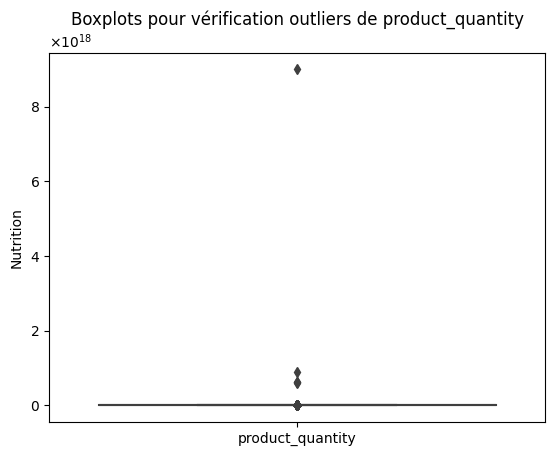

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax = sns.boxplot(df.loc[:,['product_quantity']])
ax.set_ylabel("Nutrition")
ax.set_title("Boxplots pour vérification outliers de product_quantity")

# Formatter les valeurs de l'axe y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()